# Python Warmup

### Question 1

In [8]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
text = open("random_text.txt", "r")
data = text.read()
allwords = tokenizer.tokenize(data)
stop_words = set(stopwords.words('english'))
count = 0
non_stop_word= {}
for word in allwords:
    if word not in stop_words:
        if word not in non_stop_word:
            non_stop_word[word]= 1
        else:
            non_stop_word[word]+=1

unique=[]
for word, count in non_stop_word.items():
    if count==1:
        unique.append(word)
print("Unique Non Stop Word Length:",len(unique))



Unique Non Stop Word Length: 287


In [10]:
top5=sorted(non_stop_word.items(), key=lambda item: item[1],reverse=True)[:5]
top5

[('Harry', 30), ('Voldemort', 13), ('also', 8), ('He', 8), ('Dark', 7)]

### Question 2

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [13]:
vector_x = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
vector_y = np.array([6.0,4.83,3.7,3.15,2.41,1.83,1.49,1.21,0.96,0.73,0.64])
# vector_x = np.array([0.5,2.4,3.2,4.9,6.5,7.8])
# vector_y = np.array([0.8,9.3,37.9,68.2,155.0,198.0])
print(" Vector X : ", vector_x)
print(" Vector Y : ", vector_y)

 Vector X :  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
 Vector Y :  [6.   4.83 3.7  3.15 2.41 1.83 1.49 1.21 0.96 0.73 0.64]


In [14]:
# number of observations/points
x_size = np.size(vector_x)
x_size

11

-1.0221818181818185   5.005454545454547


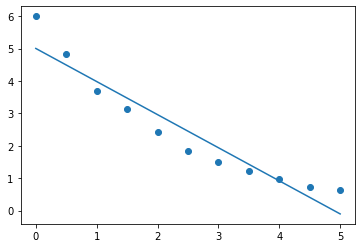

In [15]:
#find line of best fit
a, b = np.polyfit(vector_x, vector_y, 1)
print(a, " ", b)
#add points to plot
plt.scatter(vector_x, vector_y)

#add line of best fit to plot
plt.plot(vector_x, a*vector_x+b) 

In [16]:
# mean of x and y vector
mean_x = np.mean(vector_x)
mean_y = np.mean(vector_y)
print(mean_x," ",mean_y)

2.5   2.45


In [17]:
# calculating sum of squared-deviation about x and y
SS_xy = np.sum(vector_y*vector_x) - x_size*mean_x*mean_y
SS_xx = np.sum(vector_x*vector_x) - x_size*mean_x*mean_x

In [18]:
# calculating regression coefficients
m = SS_xy / SS_xx
b = mean_y - m*mean_x
print(" The Slope is : ", m)
print(" The Intercept is : ", b)

 The Slope is :  -1.022181818181818
 The Intercept is :  5.005454545454546


In [52]:
vector_y_predicted_linear = b + m*vector_x
vector_y_predicted_power = b*vector_x**m
vector_y_predicted_exp = b* np.exp(m * vector_x)
vector_y_predicted_log = m*np.log(vector_x) + b
vector_y_predicted_reciprocal = 1/(m*vector_x + b)
print('*****************Predicted Results********************')
print(f'Linear regression Results:\n{vector_y_predicted_linear}\n'
      f'Power regression Results:\n{vector_y_predicted_power}\n'
      f'Exponential Results:\n{vector_y_predicted_exp}\n'
      f'Logarithm Results:\n{vector_y_predicted_log}\n'
      f'Reciprocal Results:\n{vector_y_predicted_reciprocal}')

*****************Predicted Results********************
Linear regression Results:
[ 5.00545455  4.49436364  3.98327273  3.47218182  2.96109091  2.45
  1.93890909  1.42781818  0.91672727  0.40563636 -0.10545455]
Power regression Results:
[        inf 10.16601884  5.00545455  3.30709171  2.46454149  1.96189825
  1.6283166   1.39093572  1.21346917  1.07582484  0.96598213]
Exponential Results:
[5.00545455 3.00247611 1.80100782 1.08031806 0.6480189  0.38870821
 0.23316306 0.13986073 0.08389418 0.05032316 0.03018588]
Logarithm Results:
[       inf 5.71397699 5.00545455 4.59099548 4.2969321  4.06883882
 3.88247304 3.72490302 3.58840965 3.46801398 3.36031637]
Reciprocal Results:
[ 0.19978206  0.22250091  0.25104984  0.28800335  0.33771337  0.40816327
  0.51575394  0.70036929  1.09083697  2.46526221 -9.48275862]


/var/folders/mv/39f6vvvn1kb8pjc2zbvyxr5w0000gn/T/ipykernel_19434/501115776.py:2: RuntimeWarning: divide by zero encountered in power
  vector_y_predicted_power = b*vector_x**m
/var/folders/mv/39f6vvvn1kb8pjc2zbvyxr5w0000gn/T/ipykernel_19434/501115776.py:4: RuntimeWarning: divide by zero encountered in log
  vector_y_predicted_log = m*np.log(vector_x) + b


#### 1) Plot

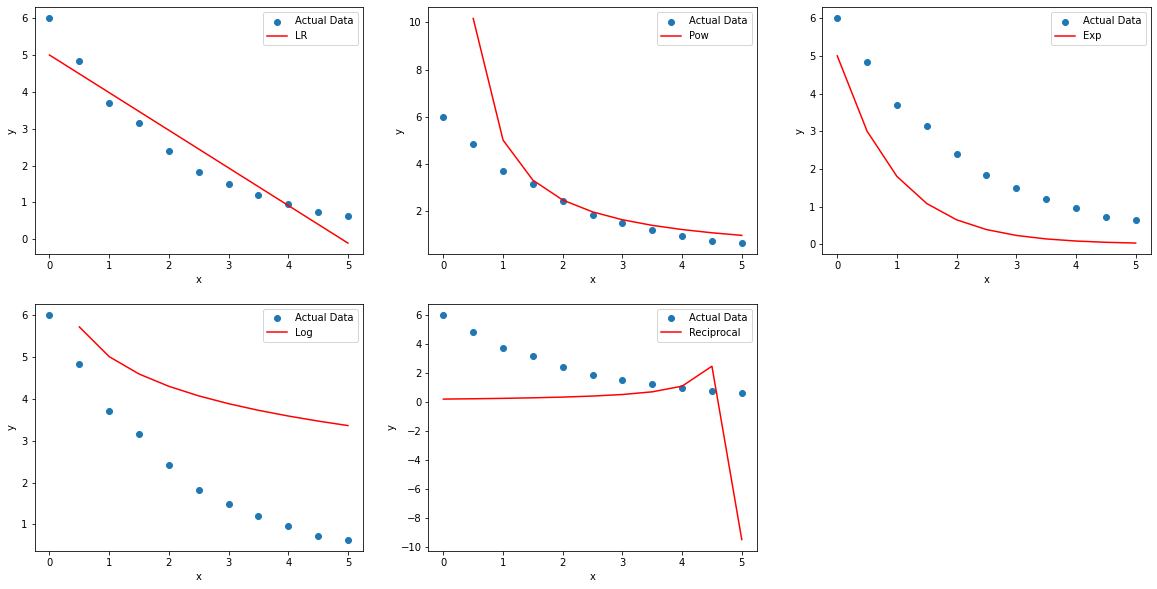

In [53]:
plt.figure(figsize=(20,10))
# plot 1 - Linear
plt.subplot(2, 3, 1)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.plot(vector_x, vector_y_predicted_linear, 'r', label='LR')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 2 - Power
plt.subplot(2, 3, 2)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.plot(vector_x, vector_y_predicted_power, 'r', label='Pow')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 3 - Exponential
plt.subplot(2, 3, 3)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.plot(vector_x, vector_y_predicted_exp, 'r', label='Exp')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 4 - Logarithmic
plt.subplot(2, 3, 4)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.plot(vector_x, vector_y_predicted_log, 'r', label='Log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 5 - Reciprocal
plt.subplot(2, 3, 5)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.plot(vector_x, vector_y_predicted_reciprocal, 'r', label='Reciprocal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It is seen that the power function fits well

#### 2) Semilogx

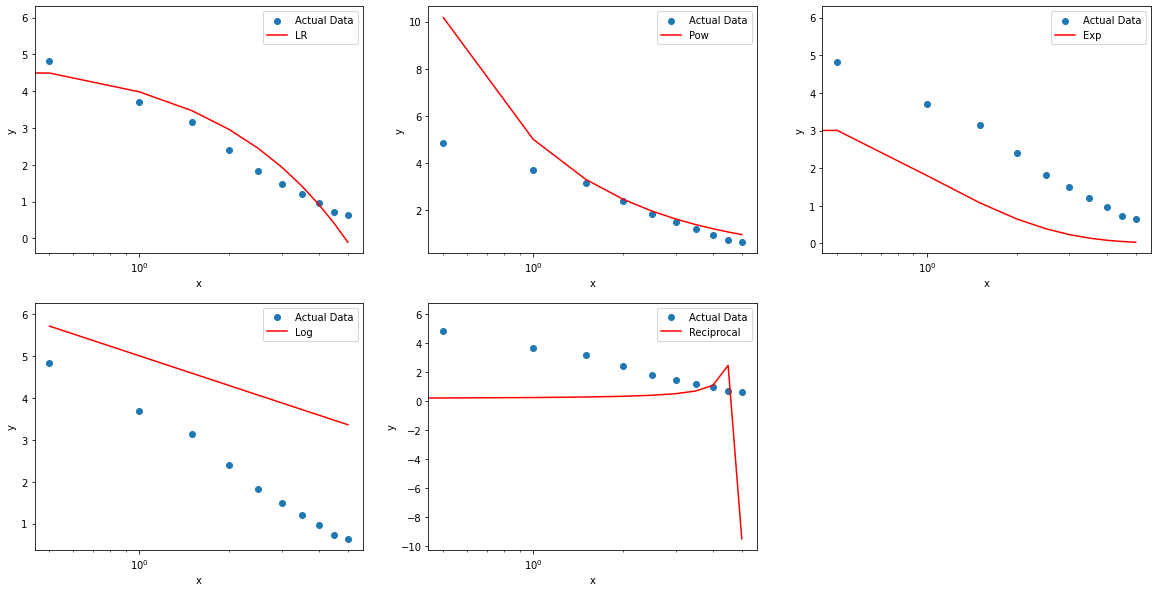

In [54]:
plt.figure(figsize=(20,10))
# plot 1 - Linear
plt.subplot(2, 3, 1)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogx(vector_x, vector_y_predicted_linear, 'r', label='LR')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 2 - Power
plt.subplot(2, 3, 2)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogx(vector_x, vector_y_predicted_power, 'r', label='Pow')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 3 - Exponential
plt.subplot(2, 3, 3)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogx(vector_x, vector_y_predicted_exp, 'r', label='Exp')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 4 - Logarithmic
plt.subplot(2, 3, 4)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogx(vector_x, vector_y_predicted_log, 'r', label='Log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 5 - Reciprocal
plt.subplot(2, 3, 5)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogx(vector_x, vector_y_predicted_reciprocal, 'r', label='Reciprocal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It is seen that the power function fits well

#### 3) Semilogy

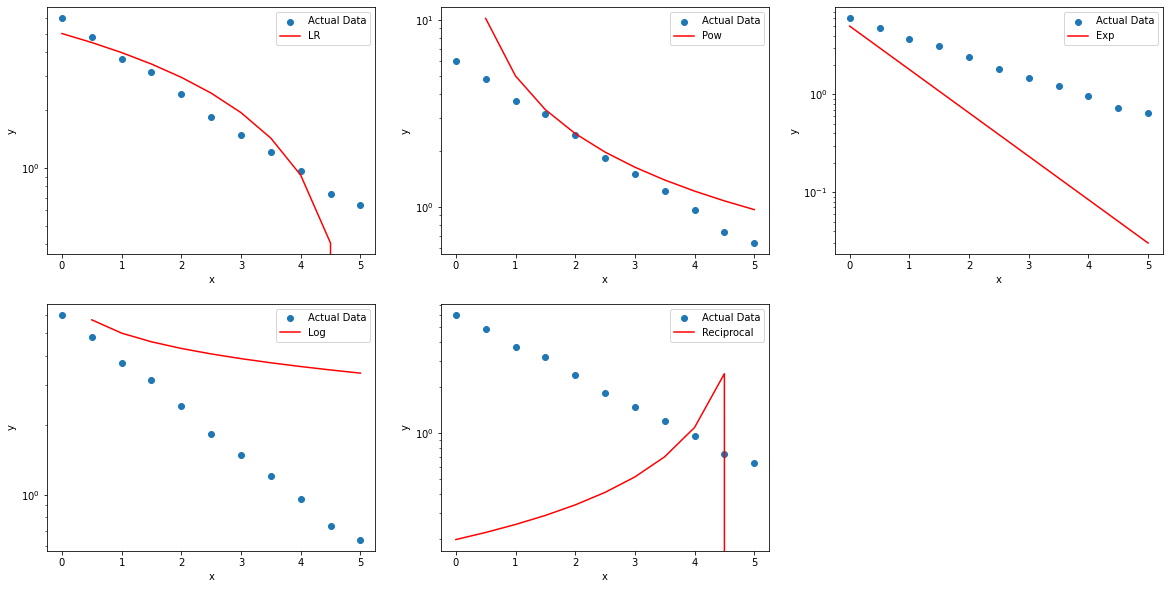

In [55]:
plt.figure(figsize=(20,10))
# plot 1 - Linear
plt.subplot(2, 3, 1)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_linear, 'r', label='LR')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 2 - Power
plt.subplot(2, 3, 2)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_power, 'r', label='Pow')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 3 - Exponential
plt.subplot(2, 3, 3)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_exp, 'r', label='Exp')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 4 - Logarithmic
plt.subplot(2, 3, 4)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_log, 'r', label='Log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 5 - Reciprocal
plt.subplot(2, 3, 5)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_reciprocal, 'r', label='Reciprocal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It is seen that the power function fits well

#### 4) LogLog

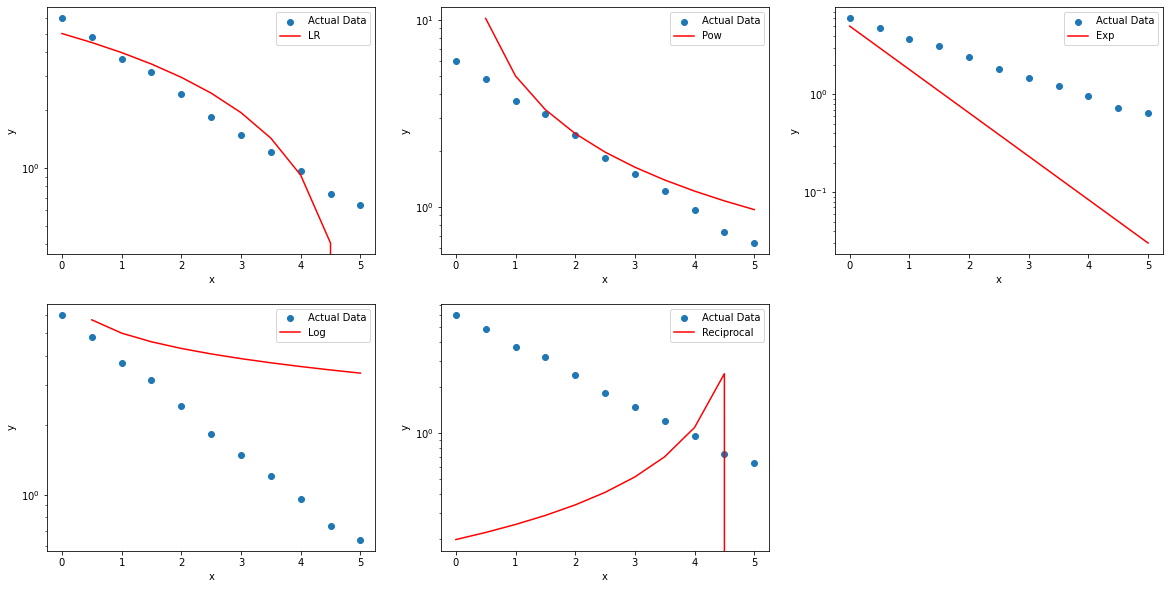

In [56]:
plt.figure(figsize=(20,10))
# plot 1 - Linear
plt.subplot(2, 3, 1)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_linear, 'r', label='LR')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 2 - Power
plt.subplot(2, 3, 2)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_power, 'r', label='Pow')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 3 - Exponential
plt.subplot(2, 3, 3)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_exp, 'r', label='Exp')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 4 - Logarithmic
plt.subplot(2, 3, 4)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_log, 'r', label='Log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot 5 - Reciprocal
plt.subplot(2, 3, 5)
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.semilogy(vector_x, vector_y_predicted_reciprocal, 'r', label='Reciprocal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It is seen that the power function fits well

Beta1 :  -1.0221818181818185   Beta0 :  5.005454545454547


/var/folders/mv/39f6vvvn1kb8pjc2zbvyxr5w0000gn/T/ipykernel_19434/4149047749.py:5: RuntimeWarning: divide by zero encountered in power
  fitted_y = beta0*vector_x**beta1


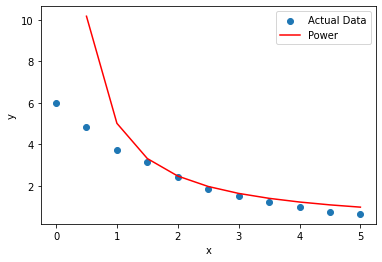

In [58]:
# applying polyfit
beta1,beta0 = np.polyfit(vector_x,vector_y,1)
print("Beta1 : ",beta1," ","Beta0 : ", beta0)

fitted_y = beta0*vector_x**beta1
#obtaining the y axis values for the fitting function
#Plotting the data
plt.scatter(vector_x, vector_y, label='Actual Data')
plt.plot(vector_x, fitted_y, 'r', label='Power')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

From all the graphs plotted for each of the equation it is observed that the Power function fits well for all plot, semilogx, semilogy and loglog plots. Hence using the polyfit command I have plotted the the best fit which is the Power function

### Question 3

In [4]:
import numpy

In [5]:
vector_x = np.array([0.5,2.4,3.2,4.9,6.5,7.8])
vector_y = np.array([0.8,9.3,37.9,68.2,155.0,198.0])
vec_x = np.log(vector_x)
vec_y = np.log(vector_y)
print(" Vector X : ", vector_x , " log Vector X : ", vec_x)
print(" Vector Y : ", vector_y , " log Vector Y : ", vec_y)
size_x = np.size(vec_x)

 Vector X :  [0.5 2.4 3.2 4.9 6.5 7.8]  log Vector X :  [-0.69314718  0.87546874  1.16315081  1.58923521  1.87180218  2.05412373]
 Vector Y :  [  0.8   9.3  37.9  68.2 155.  198. ]  log Vector Y :  [-0.22314355  2.2300144   3.63495111  4.22244456  5.04342512  5.28826703]


In [6]:

def learn_simple_linear_regression(vector_x,vector_y):
    mean_x = np.mean(vector_x)
    mean_y = np.mean(vector_y)
#     print(mean_x," ",mean_y)
    # calculating sum of squared-deviation about x and y
    size_x = np.size(vector_x)
    SS_xy = np.sum(vector_y*vector_x) - size_x*mean_x*mean_y
    SS_xx = np.sum(vector_x*vector_x) - size_x*mean_x*mean_x
    # calculating regression coefficients
    b1 = SS_xy / SS_xx
    b0 = mean_y - b1*mean_x
#     print(" The Slope is : ", b1)
#     print(" The Intercept is : ", b0)
    return (b0,b1)


In [7]:
b0,b1 = learn_simple_linear_regression(vector_x,vector_y)
print(b0, " ",b1)

-42.7308031453116   28.679241852643067


In [8]:
# Power Fit Function
def Power_Fit(vector_x,vector_y):
    b0,b1 = learn_simple_linear_regression(vector_x,vector_y)
    predicted_vector_y = b0*vector_x**b1
#     log_predicted_vector_y = math.log(b0) + b1*np.log(vector_x)
    return predicted_vector_y

In [9]:
pred_vector_y = Power_Fit(vector_x,vector_y)

In [10]:
print(pred_vector_y)

[-9.94097554e-08 -3.42697717e+12 -1.31237955e+16 -2.66097847e+21
 -8.79994213e+24 -1.64186680e+27]


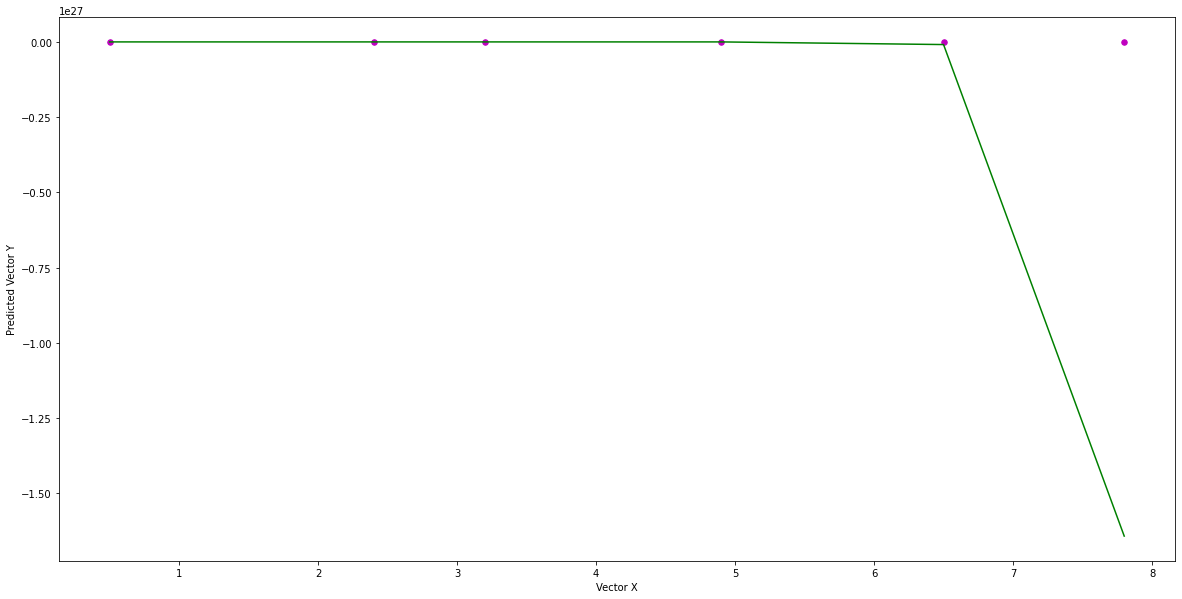

In [11]:
plt.figure(figsize=(20,10))
# plotting the actual points as scatter plot
plt.scatter(vector_x, vector_y, color = "m",marker = "o", s = 30)

# plotting the regression line
plt.plot(vector_x, pred_vector_y, color = "g")

# putting labels
plt.xlabel('Vector X')
plt.ylabel('Predicted Vector Y')

# function to show plot
plt.show()

### Question 4

In [61]:
from mpl_toolkits import mplot3d

In [62]:
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 2, 100)
theta1, r1 = np.meshgrid(theta, r)

In [63]:
x = r1 * np.cos(theta1)
y = r1 * np.sin(theta1)
z = 4 * r1

In [64]:
theta2 = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, np.pi/2, 100)
r2 = np.linspace(2, 0, 100)
theta3, phi1 = np.meshgrid(theta2, phi)

In [65]:
x1 = r1*np.cos(theta1)*np.sin(phi1)
y1= r1*np.sin(theta1)*np.sin(phi1)
z1= 8 + r1*np.cos(phi1)

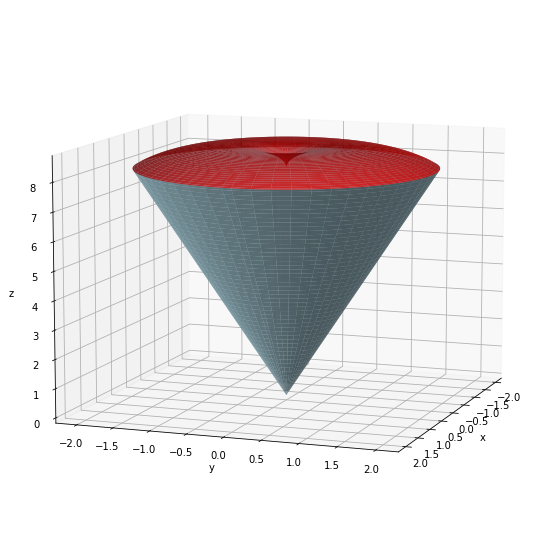

In [76]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z, alpha=0.8, color="lightblue")
ax.plot_surface(x1,y1,z1, alpha=0.8, color="red")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 20)